In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/star-categorization-giants-and-dwarfs/Star99999_raw.csv
/kaggle/input/star-categorization-giants-and-dwarfs/Star39552_balanced.csv
/kaggle/input/star-categorization-giants-and-dwarfs/Star9999_raw.csv
/kaggle/input/star-categorization-giants-and-dwarfs/Star3642_balanced.csv


# **Get Data** #

In [2]:
# Read Data
data = pd.read_csv('../input/star-categorization-giants-and-dwarfs/Star39552_balanced.csv') # data pre-processed
dataRaw = pd.read_csv('/kaggle/input/star-categorization-giants-and-dwarfs/Star99999_raw.csv') # data initial or Raw 
dataRaw.info()  # review types variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  99999 non-null  int64 
 1   Vmag        99999 non-null  object
 2   Plx         99999 non-null  object
 3   e_Plx       99999 non-null  object
 4   B-V         99999 non-null  object
 5   SpType      97377 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


#  **Exploratory Data Analysis** #

In [3]:
# convert object to numeric
dataRaw['Vmag'] = pd.to_numeric(dataRaw['Vmag'] , downcast='float' , errors='coerce')
dataRaw['Plx'] = pd.to_numeric(dataRaw['Plx'] , downcast='float' , errors='coerce')
dataRaw['e_Plx'] = pd.to_numeric(dataRaw['e_Plx'] , downcast='float' , errors='coerce')
dataRaw['B-V'] = pd.to_numeric(dataRaw['B-V'] , downcast='float' , errors='coerce')
dataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  99999 non-null  int64  
 1   Vmag        99998 non-null  float32
 2   Plx         99768 non-null  float32
 3   e_Plx       99768 non-null  float32
 4   B-V         98871 non-null  float32
 5   SpType      97377 non-null  object 
dtypes: float32(4), int64(1), object(1)
memory usage: 3.1+ MB


### Missing Values ###

In [4]:
missingValueCount = dataRaw.isnull().sum()
print('Num_null: ' , missingValueCount.sum() )

dataLabel = dataRaw.dropna()
dataUnlabel = dataRaw.fillna(0)

print( dataLabel.shape , dataRaw.shape , dataUnlabel.shape )

totalData = np.product(dataRaw.shape)
percentMissing=missingValueCount.sum()/totalData

print('Percentage Missing:', '{: .3%}'.format(percentMissing))
dataRaw = dataLabel

Num_null:  4213
(96742, 6) (99999, 6) (99999, 6)
Percentage Missing:  0.702%


In [5]:
dataRaw = dataRaw.drop(['Unnamed: 0'], axis=1)
dataRaw.describe()

,Vmag,Plx,e_Plx,B-V
count,96742.000000,96742.000000,96742.000000,96742.000000
mean,8.291918,7.105242,1.264163,0.700663
std,1.247995,11.145643,1.156202,0.490053
min,-1.440000,-35.099998,0.380000,-0.400000
25%,7.610000,2.520000,0.870000,0.342000
50%,8.400000,4.600000,1.080000,0.605000
75%,9.070000,8.270000,1.360000,1.072000
max,13.610000,772.330017,69.070000,5.460000


array([[<AxesSubplot:title={'center':'Vmag'}>,
        <AxesSubplot:title={'center':'Plx'}>],
       [<AxesSubplot:title={'center':'e_Plx'}>,
        <AxesSubplot:title={'center':'B-V'}>],
       [<AxesSubplot:title={'center':'Amag'}>,
        <AxesSubplot:title={'center':'TargetClass'}>]], dtype=object)

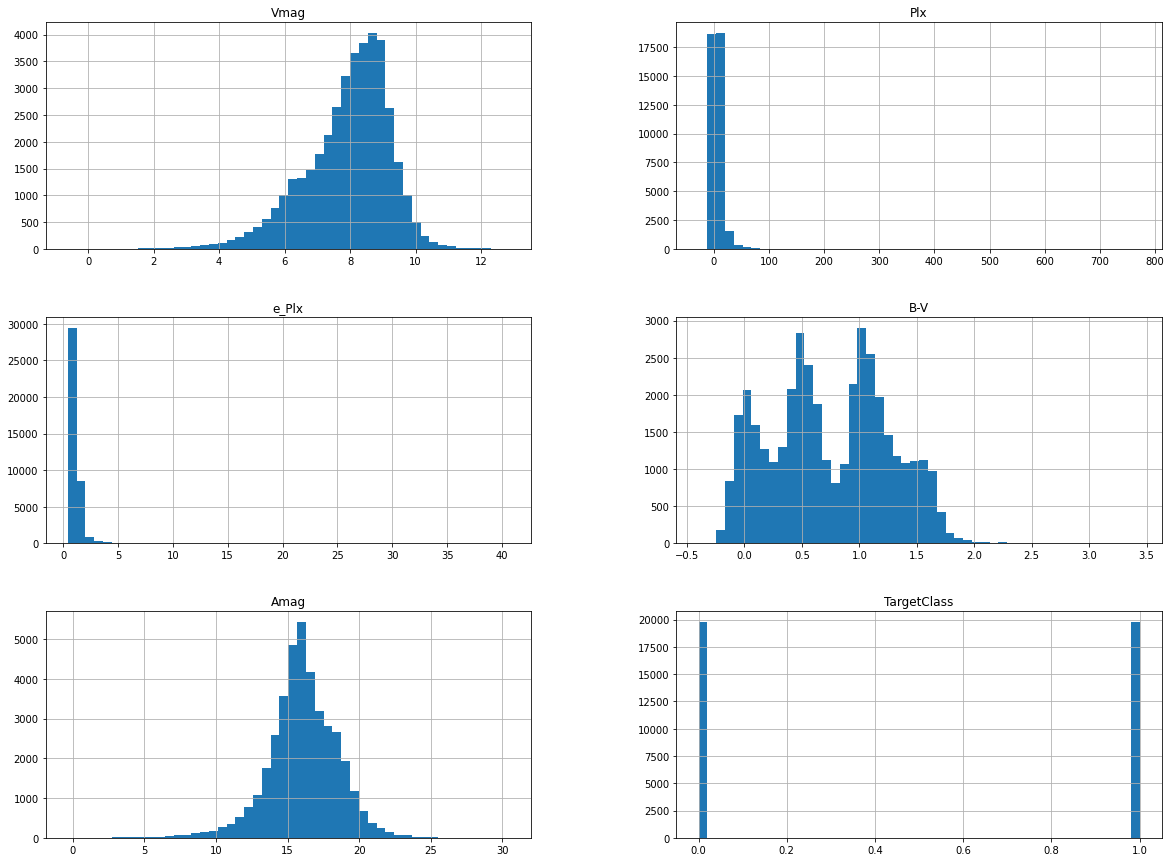

In [6]:
data.hist(bins=50 , figsize=(20,15) ) # histograma

## Pre-Processing ##

In [7]:
# New variables

data = dataRaw
data = data[data.Plx != 0]
data = data.reset_index(drop=True)

data['Amag']   = data['Vmag'] + 5*( np.log10( np.abs( data['Plx'] ) )+ 1 )  # log is ln
data['e_Amag'] = 5*data['e_Plx']/(data['Plx']*np.log(10) )   # propagacion de error

data['eA/A']   = data['e_Amag']/data['Amag']
data['eP/P']   = data['e_Plx']/data['Plx']

dataRaw = data
dataRaw.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,e_Amag,eA/A,eP/P
0,9.10,3.54,1.39,0.482,F5,16.845016,0.852640,0.050617,0.392655
1,9.27,21.90,3.10,0.999,K3V,20.972221,0.307377,0.014656,0.141553
2,6.61,2.81,0.63,-0.019,B9,13.853533,0.486843,0.035142,0.224199
3,8.06,7.75,0.97,0.370,F0V,17.506508,0.271784,0.015525,0.125161
4,8.55,2.87,1.11,0.902,G8III,15.839410,0.839838,0.053022,0.386760


In [8]:
#dataRaw = dataRaw.drop('Unnamed: 0', axis=1)
dataRaw['TargetClass'] = dataRaw['SpType']

dataRaw = dataRaw.reset_index(drop=True) # reindexar debido al drop
dataRaw.head() 

,Vmag,Plx,e_Plx,B-V,SpType,Amag,e_Amag,eA/A,eP/P,TargetClass
0,9.10,3.54,1.39,0.482,F5,16.845016,0.852640,0.050617,0.392655,F5
1,9.27,21.90,3.10,0.999,K3V,20.972221,0.307377,0.014656,0.141553,K3V
2,6.61,2.81,0.63,-0.019,B9,13.853533,0.486843,0.035142,0.224199,B9
3,8.06,7.75,0.97,0.370,F0V,17.506508,0.271784,0.015525,0.125161,F0V
4,8.55,2.87,1.11,0.902,G8III,15.839410,0.839838,0.053022,0.386760,G8III


In [9]:
dataRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96707 entries, 0 to 96706
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         96707 non-null  float32
 1   Plx          96707 non-null  float32
 2   e_Plx        96707 non-null  float32
 3   B-V          96707 non-null  float32
 4   SpType       96707 non-null  object 
 5   Amag         96707 non-null  float32
 6   e_Amag       96707 non-null  float32
 7   eA/A         96707 non-null  float32
 8   eP/P         96707 non-null  float32
 9   TargetClass  96707 non-null  object 
dtypes: float32(8), object(2)
memory usage: 4.4+ MB


## Target Class: Giants or Dwarfs ##

In [10]:
# Procesamiento target, clasificar en Giants and dwarfs


for i in range(len(dataRaw['TargetClass'])):
    if "I" in dataRaw.loc[i,'TargetClass']: 
        dataRaw.loc[i,'TargetClass'] = 1   # 1 giant       
    elif ("VII" or "VI") in dataRaw.loc[i,'TargetClass']: 
        dataRaw.loc[i,'TargetClass'] = 0 # VII is Dwarf (0)
    elif "V" in dataRaw.loc[i,'TargetClass']: 
        if ('G' or 'K' or 'M' or 'L' or 'T') in  dataRaw.loc[i,'TargetClass']:
            dataRaw.loc[i,'TargetClass'] = 0
        else:
            dataRaw.loc[i,'TargetClass'] = 9
    else: 
        dataRaw.loc[i,'TargetClass'] = 9 # None
        
dataRaw['TargetClass']

dataRaw.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,e_Amag,eA/A,eP/P,TargetClass
0,9.10,3.54,1.39,0.482,F5,16.845016,0.852640,0.050617,0.392655,9
1,9.27,21.90,3.10,0.999,K3V,20.972221,0.307377,0.014656,0.141553,9
2,6.61,2.81,0.63,-0.019,B9,13.853533,0.486843,0.035142,0.224199,9
3,8.06,7.75,0.97,0.370,F0V,17.506508,0.271784,0.015525,0.125161,9
4,8.55,2.87,1.11,0.902,G8III,15.839410,0.839838,0.053022,0.386760,1


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TargetClass', ylabel='count'>

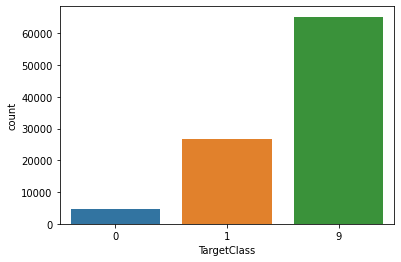

In [11]:
sns.countplot( dataRaw['TargetClass'] )

In [12]:
dataRaw['TargetClass'].value_counts()

9    65279
1    26647
0     4781
Name: TargetClass, dtype: int64

### Selection only Giants or Dwarfs ###

In [13]:
# copy and drop number 9
df = dataRaw[dataRaw.TargetClass != 9 ] # != return  boolean

## Balance ##

In [14]:
# dividir set 

dfGiants = df[df.TargetClass == 1]
dfDwarfs = df[df.TargetClass == 0]
num_of_giant = dfGiants.shape[0]
num_of_dwarf = dfDwarfs.shape[0]

from sklearn.utils import resample
dfGiantsDownSample = resample(dfGiants, 
                             replace = False, # sample without replacement
                             n_samples = num_of_dwarf,
                             random_state =1 
                             )
dfDownSampled = pd.concat([dfGiantsDownSample , dfDwarfs] )

1    4781
0    4781
Name: TargetClass, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


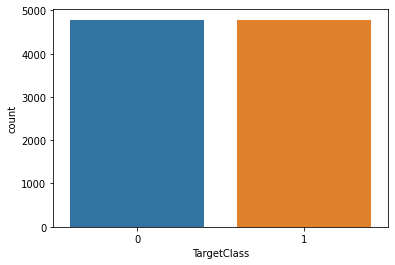

In [15]:
sns.countplot(dfDownSampled['TargetClass'])
print( dfDownSampled['TargetClass'].value_counts())

In [16]:
dfBalanced= dfDownSampled.reset_index(drop=True)
dfBalanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         9562 non-null   float32
 1   Plx          9562 non-null   float32
 2   e_Plx        9562 non-null   float32
 3   B-V          9562 non-null   float32
 4   SpType       9562 non-null   object 
 5   Amag         9562 non-null   float32
 6   e_Amag       9562 non-null   float32
 7   eA/A         9562 non-null   float32
 8   eP/P         9562 non-null   float32
 9   TargetClass  9562 non-null   object 
dtypes: float32(8), object(2)
memory usage: 448.3+ KB


In [17]:
dataStar = dfBalanced.sample(frac=1).reset_index(drop=True) # shuffle
dfCopyStar = dataStar.copy()


## Visualization ##

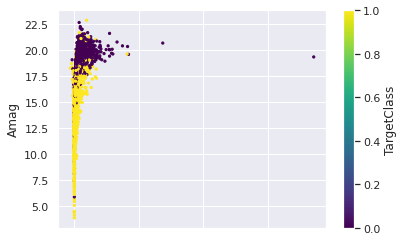

<Figure size 432x288 with 0 Axes>

In [18]:
%matplotlib inline

sns.set()
dataStar.plot.scatter( x="Plx" ,y="Amag",cmap='viridis' ,  c='TargetClass' ,s=5); # problem with TargetClass
plt.xlabel("Plx")
plt.figure()
plt.show()


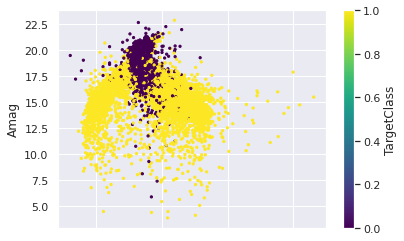

<Figure size 432x288 with 0 Axes>

In [19]:
%matplotlib inline
sns.set()
dataStar.plot.scatter( x="B-V" ,y="Amag",cmap='viridis' ,  c='TargetClass' ,s=5); # problem with TargetClass
plt.xlabel("Plx")
plt.figure()
plt.show()



Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
e_Amag         0
eA/A           0
eP/P           0
TargetClass    0
dtype: int64

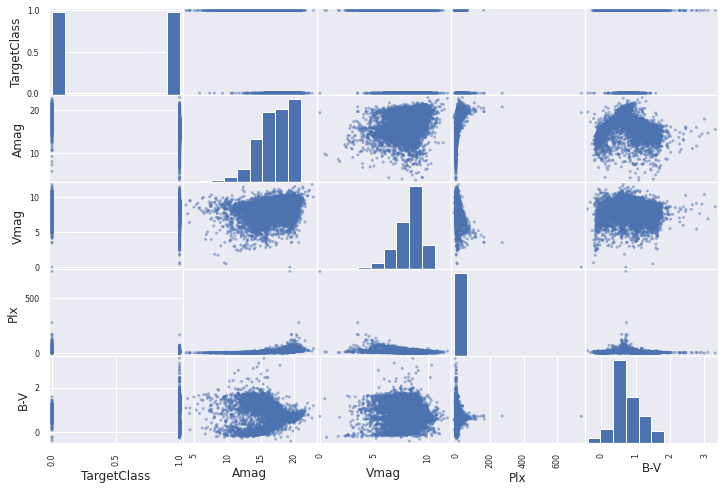

In [20]:
# scatter attributes

from pandas.plotting import scatter_matrix

attributes = ['TargetClass','Amag' , 'Vmag' , 'Plx' , 'B-V']

# convert a numerical Targetclass 
dataStar['TargetClass'] = pd.to_numeric(dataStar['TargetClass'] , downcast='float' , errors='coerce')

scatter_matrix(dataStar[attributes] , figsize=(12, 8))
dataStar.isnull().sum()


## Correlation Linear ##

In [21]:
corr_matrix = dataStar.corr()
corr_matrix["TargetClass"].sort_values(ascending=False)

TargetClass    1.000000
B-V            0.302299
eP/P           0.036399
e_Amag         0.036399
eA/A           0.023408
e_Plx         -0.242699
Plx           -0.365910
Vmag          -0.381619
Amag          -0.735124
Name: TargetClass, dtype: float64

## Data Cleaning ##

In [22]:
#dataStar = dataStar.drop(['Unnamed: 0'], axis =1)
dataStar = dataStar.drop(['SpType'], axis =1)



# **Data Processing** #

In [23]:
dataStar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         9562 non-null   float32
 1   Plx          9562 non-null   float32
 2   e_Plx        9562 non-null   float32
 3   B-V          9562 non-null   float32
 4   Amag         9562 non-null   float32
 5   e_Amag       9562 non-null   float32
 6   eA/A         9562 non-null   float32
 7   eP/P         9562 non-null   float32
 8   TargetClass  9562 non-null   float32
dtypes: float32(9)
memory usage: 336.3 KB


### Train and test Set ###

In [24]:
from sklearn.model_selection import train_test_split


train , test = train_test_split(dataStar , test_size = 0.2, random_state = 42 )
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [25]:
## Stratified ##
#from sklearn.model_selection import StratifiedShuffleSplit
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#for train_index, test_index in split.split(data, data["variableStratificada"]):
#strat_train_set = housing.loc[train_index]
#strat_test_set = housing.loc[test_index]

#from  sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='median')

#from  sklearn.preprocessing import OneHotEncoder
#catEncoder = OneHotEncoder()

## numerical ##
#from  sklearn.pipeline import Pipeline
#from  sklearn.preprocessing import StandardScaler
#numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('attribs_adder', CombinedAttributesAdder()),])
# new_variable_transformed_numerical = num_pipeline.fit_transform(varible_numerica)

## numerical and categorial ##
#from sklearn import ColumnTransformer
#numerical_attribs = list(numerical_columns)
#categorical_attribs = list(categorial_columns)
#full_pipeline = ColumnTransformer([("num", numerical_pipeline, numerical_attribs),("cat", OneHotEncoder(), categorical_attribs),])
#dataTotal_prepared = full_pipeline.fit_transform(dataTotal) 

## Target ## 

In [26]:
trainX = train.drop('TargetClass', axis=1)
trainY = train['TargetClass'].copy()

testX = test.drop('TargetClass', axis=1)
testY = test['TargetClass'].copy()
trainX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7649 entries, 0 to 7648
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vmag    7649 non-null   float32
 1   Plx     7649 non-null   float32
 2   e_Plx   7649 non-null   float32
 3   B-V     7649 non-null   float32
 4   Amag    7649 non-null   float32
 5   e_Amag  7649 non-null   float32
 6   eA/A    7649 non-null   float32
 7   eP/P    7649 non-null   float32
dtypes: float32(8)
memory usage: 239.2 KB


## Featuring Engineering ##

##  Pipeline and Featuring Scaling ##

In [27]:
from  sklearn.impute import SimpleImputer
from  sklearn.preprocessing import OneHotEncoder

from  sklearn.pipeline import Pipeline
from  sklearn.preprocessing import StandardScaler

numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                              ('std_scaler', StandardScaler())] )

from sklearn.compose import ColumnTransformer

num_attribs = list(trainX)
#cat_attribs = ["ocean_proximity"] ---generar lista de attribus catecorial---
full_pipeline = ColumnTransformer([("num", numerical_pipeline, num_attribs),
#                                   ("cat", OneHotEncoder(), cat_attribs),
                                  ])

Xtrain = full_pipeline.fit_transform(trainX)  # array

print('Done')

Done


 # **MODEL** # 

#### Models ####

In [28]:
# Models ==> ['logisRegre' , 'SVM'   , 'SGDClf' ,  'randomForestClassifier' , 'navieBayes']

# Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


In [29]:

SGDClf = SGDClassifier(random_state=42)
SGDClf.fit(Xtrain, trainY) # fit equal training

LRClf = LogisticRegression(random_state=0)
RFClf = RandomForestClassifier(random_state=0)
SVClf = LinearSVC(random_state=0)


#SGDClf.fit(Xtrain, trainY)

## Cross-Validation ##

In [30]:
from sklearn.model_selection import cross_val_score

# automatizar entre diversos modelos de la misma categoria
def compareModels(models, x, y, numCV, scoringT="neg_mean_squared_error"):
    modelsCV = dict()
    for mod in models:
        scores = cross_val_score(mod, x, y, scoring = scoringT, cv=numCV)
        meanScore = np.sqrt(-scores).mean()
        modelsCV[meanScore] = mod
    
    val=min(modelsCV)
    bestModel = modelsCV[val]
    return modelsCV,bestModel
    
result, model =compareModels([SGDClf , LRClf, RFClf] , Xtrain , trainY , 6)
print(result); print('\n'); print(model); print('DONE')

{0.30404183556032716: SGDClassifier(random_state=42), 0.29591473451931405: LogisticRegression(random_state=0), 0.24500400484537124: RandomForestClassifier(random_state=0)}


RandomForestClassifier(random_state=0)
DONE


In [31]:
model.fit(Xtrain, trainY)

Xtest = full_pipeline.fit_transform(testX)
Ypredicts = model.predict(Xtest)


In [32]:
# metrica
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(testY , Ypredicts) 
rmse = np.sqrt(mse)
rmse

0.2408818

In [33]:
output = pd.DataFrame({'Star': testY, 'StarPred': Ypredicts})

def precision(a, b):
    cont = 0
    for i in np.arange(len(a)):
        if (a[i]==b[i]):
            cont = cont +1
             
            
    return  format( cont/len(a) , '2%') 

precision(testY , Ypredicts)

'94.197595%'

In [34]:
### stratified CV ### see pag 136  Geron's book
#from sklearn.model_selection import StratifiedKFold
#from sklearn.base import clone
#skfolds = StratifiedKFold(n_splits=3, random_state=42)

# **Refinament** #

### Hyper-parameters ###

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


#distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2','l1'])
#clf=RandomizedSearchCV( RFClf , distributions , random_state=0) # arg (model , distri , ...)


parameter_grid = [{'n_estimators':[3,5,10], 'max_features':[2,4,6,8]} ,
                  {'bootstrap':[False], 'n_estimators':[3,7,12] , 'max_features':[2,3,4]}]
clf=GridSearchCV( RFClf , parameter_grid,
                cv=5 ,  scoring='neg_mean_squared_error' , return_train_score=True) # arg (model , distri , ...)


clf.fit(Xtrain, trainY)

clf.best_params_

{'max_features': 4, 'n_estimators': 10}

###  Model-Hyperparameters ###

In [36]:
finalModel=clf.best_estimator_
Ypredfinal=finalModel.predict(Xtest)

precision(testY , Ypredfinal) # worse model

'93.256665%'

In [37]:
print('Done')

Done


# **Deploy** #